# Author : Namya Shrinidhi Sharma

# The Sparks Foundation - GRIP

# Data Science and Business Analytics Internship  - #GRIPJUNE21

## Task 1 : To predict the score of a student who studies for 9.25 hours per day

### Modules used :
              1. numpy and pandas - for data manipulation
              2. matplotlib and seaborn - for data visualisation
              3. sklearn for modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Importing the dataset 

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
scores = pd.read_csv(url)

In [3]:
print("First 5 elements of the given dataset")
scores.head()

First 5 elements of the given dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print('Shape of the Dataset-->',scores.shape)
print ('Columns names -->',scores.columns)
print ('Columns Datatype -->', scores.dtypes)

Shape of the Dataset--> (25, 2)
Columns names --> Index(['Hours', 'Scores'], dtype='object')
Columns Datatype --> Hours     float64
Scores      int64
dtype: object


## Exploratory Data Analysis - EDA
 To achieve better results from the applied model in Machine Learning, the data has to be cleaned and formatted. We will have to check for the following :

 (i) Missing values (ii) Outliers

##### Summary : 

In [5]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Check for missing values : 

In [6]:
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

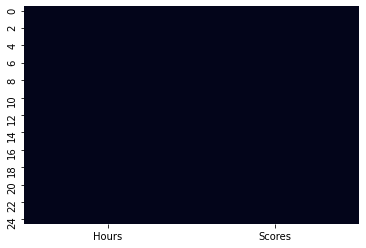

In [7]:
sns.heatmap(scores.isnull(), cbar=False)

We can observe that there are no missing values in the dataset

Let us now check for outliers.

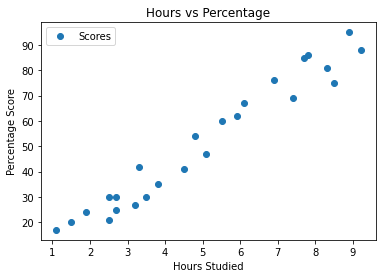

In [8]:
scores.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

We observe that there are no major outliers that may disrupt our analysis

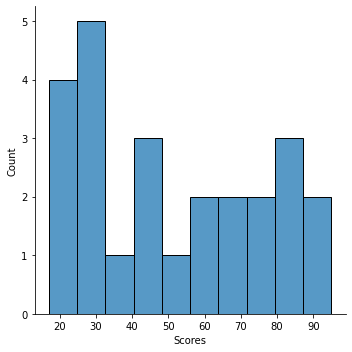

In [9]:
sns.displot(scores['Scores'], bins=10)
plt.show()

All of the scores plotted are in the positive side. Hence, we can perform linear regression to predict the score of the student.
Let us look at the correlation matrix to see how closely the scores and marks obtained are correlated.

<AxesSubplot:>

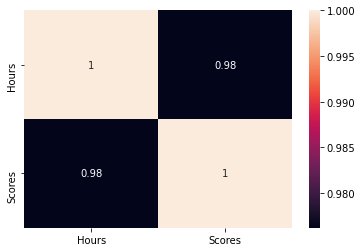

In [10]:
sns.heatmap(scores.corr(),annot=True)

We can see that the hours spent on studying are very closely correlated to the scores received by student.

## Preparing the training data for Linear Regression
Independent variable --> Number of hours studied

Dependent variable --> Scores obtained

In [11]:
X = scores.iloc[:, :-1].values  
y = scores.iloc[:, 1].values  

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

## Training the Algorithm
We have split our data into training and testing sets. 
We can start the training on our set.

In [13]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 
print("Linear regression training is complete.")

Linear regression training is complete.


Now let us plot the regression line and plot for our test data

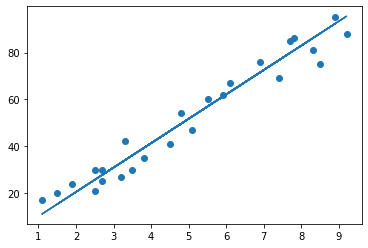

In [14]:
line = lr.coef_*X+lr.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Predictions
Now that our dataset has been trained, let us see the predicted values 

In [15]:
print(x_test)
predict = lr.predict(x_test) 

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]
 [2.7]
 [8.5]
 [2.5]]


Let us compare the predicted values with the actual values to look at the accuracy of prediction of our model

In [16]:
comp = pd.DataFrame({'Actual scores': y_test, 'Predicted scores': predict})  
comp

,Actual scores,Predicted scores
0,17,11.029003
1,21,25.628017
2,24,19.371297
3,88,95.494730
4,76,71.510634
5,25,27.713591
6,75,88.195222
7,30,25.628017


Let us try adding our own inputs to see what the model predicts the score as.
In this case, the sample input is number of hours.
I am testing for hours = 9.25


In [17]:
sample=[[9.25]]
lm = lr.predict(sample)
print("No of Hours = {}".format(sample))
print("Predicted Score = {}".format(lm[0]))

No of Hours = [[9.25]]
Predicted Score = 96.01612299632009


## Evaluation of Train and Test scores

In [18]:
print('Training Score : ', lr.score(x_train, y_train))
print('Test Score : ', lr.score(x_test, y_test))

Training Score :  0.9496868783142939
Test Score :  0.9420584734434517


Let us obtain the p-value to see the accuracy of our model

In [19]:
t_statistic, pvalues =stats.ttest_ind(y_test, lr.predict(x_test))
print('t-statistic -->',t_statistic)
print('P-value -->',pvalues)

t-statistic --> -0.06749127427810271
P-value --> 0.9471450243074203


P-value of 0.947 indicates that our model is 95% accurate 

## Metrics

In [20]:
print('MAE - Mean absolute error : ', metrics.mean_absolute_error(y_test, predict))
print('MSE - Mean squared error : ', metrics.mean_squared_error(y_test, predict))
print('RMSE - Root mean squared error : ', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE - Mean absolute error :  5.936576124243742
MSE - Mean squared error :  44.426665487233365
RMSE - Root mean squared error :  6.665333111498132


## Conclusion
In summary, the performance of model on test sample are in acceptable range. The model can predict with an accuracy of 95%.